# SEIR model class experiments

Utilities for train, forecasting and plotting are now provided in nb_utils.
Documentation for the helper functions are available as docstrings.

Set the appropriate training parameters and forecast parameters in the 
corresponding cells.

train_eval   
> Train and evaluate models (currently we only support SEIR family). 
  Default configuration parameters for train and test files are 
  provided as train_config.json and test_config.json respectively.
  Search paramters, loss functions etc, are specified in the config
  files.

forecast, plot
> Generate forecasts using a trained model and plotting utilities.

In [1]:
import json

import pandas as pd

from nb_utils import train_eval
from nb_utils import forecast
from nb_utils import plot

## Load default configurations

In [2]:
with open('train_config.json') as f_train, \
    open('test_config.json') as f_test, \
    open('forecast_config.json') as f_forecast:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)

## Set the model class

In [3]:
model_class = 'SEIHRD'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

## Optional: Modify training loss function

In [4]:
variable_and_weights = [('confirmed', 1.0) , ('recovered', 1.0), ('deceased', 1.0), ('hospitalized', 1.0)]
weights = {'metric_name' : 'mape', 'variable_weights' : []}
for (variable, weight) in variable_and_weights:
    weights['variable_weights'].append({
        "variable" : variable,
        "weight" : weight
    })
default_train_config['training_loss_function'].update(weights)

## Training parameters

In [5]:
region = 'mumbai'
region_type = 'district'
train1_start_date = '4/8/20'
train1_end_date = '4/17/20'
train2_start_date = '4/13/20'
train2_end_date = '4/22/20'
run_day = '4/17/20'
test_start_date = '4/18/20'
test_end_date = '4/22/20'

## train_eval on the region of interest

In [6]:
params, metrics, model_params = train_eval(region, region_type, 
                                           train1_start_date, train1_end_date, 
                                           train2_start_date, train2_end_date, run_day,
                                           test_start_date, test_end_date,
                                           default_train_config, default_test_config,
                                           max_evals = 10,
                                           mlflow_log = False,
                                           name_prefix = 'mumbai_sample');

t = 10.90                                             
t = 10.90                                             
t = 10.90                                                                       
t = 10.90                                                                       
t = 10.90                                                                       
t = 10.90                                                                       
t = 10.90                                                                       
t = 10.90                                                                       
t = 10.90                                                                       
t = 10.90                                                                       
100%|██████████| 10/10 [00:00<00:00, 13.49trial/s, best loss: 12250.228307340432]
Best fit: {'EbyCRatio': 25.209832752127557, 'F_fatalities': 0.04413889938830243, 'F_hospitalization': 0.0528620471607663, 'IbyCRatio': 1.787494489506607, 'infec

## Inspect model parameters

In [7]:
model_params

{'region': 'mumbai',
 'region_type': 'district',
 'model_type': 'SEIHRD',
 'model_parameters': {'incubation_period': 5,
  'F_icu': 0.05,
  'EbyCRatio': 36.866279450224404,
  'F_fatalities': 0.027533999881324447,
  'F_hospitalization': 0.07870178074485647,
  'IbyCRatio': 0.709302331748716,
  'infectious_period': 8.719643602654692,
  'r0': 3.4689167621881953,
  'LatentEbyCRatio': {'4/12/20': 36.866279450224404,
   '4/22/20': 3.610553062252821},
  'LatentIbyCRatio': {'4/12/20': 0.709302331748716,
   '4/22/20': 0.4066970172602566},
  'MAPE': 44379.49735785053}}

## Forecast intervals

In [8]:
forecast_run_day = '4/12/20'
forecast_start_date = '4/13/20'
forecast_end_date = '4/22/20'

## Generate forecasts

In [9]:
forecast_df = forecast(model_params, forecast_run_day, forecast_start_date, 
                       forecast_end_date, default_forecast_config)

t = 10.90


In [10]:
forecast_df

prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,...,hospitalized_min,hospitalized_max,icu_min,icu_max,recovered_min,recovered_max,deceased_min,deceased_max,confirmed_min,confirmed_max
0,4/13/20,42557.289234,50.071038,873.756293,24.739174,1899.916237,1001.420769,1001.420769,9246.402020,898.495468,...,-4.434241e+05,4.454269e+05,-22171.204153,22271.346230,-3.868949e+05,3.886424e+05,-10954.381940,11003.860288,-8.412734e+05,8.450732e+05
1,4/14/20,42946.167242,76.161463,1794.281734,50.802550,3368.313542,1523.229257,1523.229257,16251.173376,1845.084285,...,-6.744783e+05,6.775247e+05,-33723.912934,33876.235860,-7.944989e+05,7.980875e+05,-22495.113999,22596.719100,-1.491472e+06,1.498209e+06
2,4/15/20,47528.363347,115.304361,3219.973529,91.168998,5617.229754,2306.087227,2306.087227,22986.441435,3311.142527,...,-1.021124e+06,1.025736e+06,-51056.191634,51286.800356,-1.425788e+06,1.432228e+06,-40369.174038,40551.512034,-2.487281e+06,2.498516e+06
3,4/16/20,55607.243709,160.892715,5291.506395,149.821522,8659.182211,3217.854293,3217.854293,30203.968441,5441.327918,...,-1.424850e+06,1.431285e+06,-71242.485340,71564.270769,-2.343052e+06,2.353635e+06,-66340.216980,66639.860024,-3.834242e+06,3.851561e+06
4,4/17/20,67055.637053,212.707149,8102.664890,229.415500,12586.223366,4254.142976,4254.142976,38482.239525,8332.080391,...,-1.883713e+06,1.892221e+06,-94185.656325,94611.070622,-3.587819e+06,3.604025e+06,-101584.030478,102042.861479,-5.573116e+06,5.598289e+06
5,4/18/20,82046.011192,272.721720,11759.474995,332.952908,17546.862312,5454.434408,5454.434408,48377.710788,12092.427904,...,-2.415196e+06,2.426105e+06,-120759.806980,121305.250421,-5.207036e+06,5.230555e+06,-147429.874305,148095.780122,-7.769662e+06,7.804756e+06
6,4/19/20,101152.099817,344.360503,16410.610752,464.643241,23762.464050,6887.210056,6887.210056,60402.152317,16875.253993,...,-3.049622e+06,3.063396e+06,-152481.099745,153169.820751,-7.266536e+06,7.299357e+06,-205741.691820,206670.978303,-1.052190e+07,1.056942e+07
7,4/20/20,125089.245956,431.090783,22257.754000,630.196836,31509.766505,8621.815669,8621.815669,75186.113043,22887.950836,...,-3.817697e+06,3.834940e+06,-190884.832057,191747.013624,-9.855622e+06,9.900137e+06,-279047.991170,280308.384841,-1.395237e+07,1.401539e+07
8,4/21/20,154849.626487,537.253055,29560.067993,836.951532,41142.080623,10745.061098,10745.061098,93443.733949,30397.019525,...,-4.757859e+06,4.779349e+06,-237892.952246,238967.458356,-1.308905e+07,1.314817e+07,-370597.931494,372271.834558,-1.821751e+07,1.829979e+07
9,4/22/20,191741.689896,668.075844,38650.066675,1094.321993,53105.905547,13361.516879,13361.516879,116004.983777,39744.388668,...,-5.916413e+06,5.943136e+06,-295820.625670,297156.777358,-1.711406e+07,1.719136e+07,-484560.277919,486748.921904,-2.351503e+07,2.362124e+07


## Generate plots

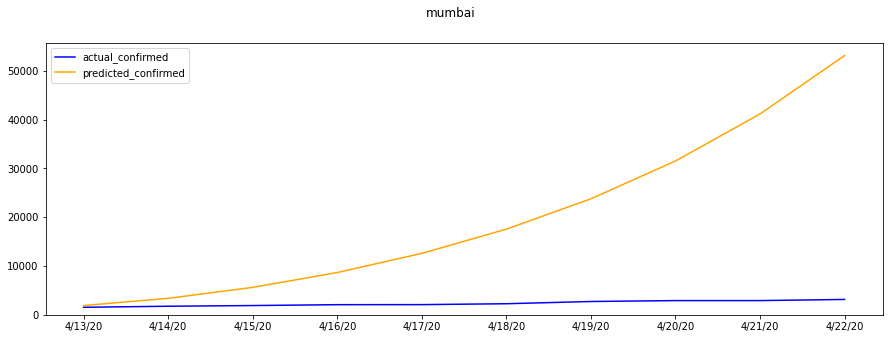

In [11]:
plot(model_params, forecast_df, forecast_start_date, forecast_end_date)

In [8]:
experiments = pd.read_csv('experiments.csv')

In [9]:
experiments

,region,region_type,train1_start_date,train1_end_date,test_start_date,test_end_date,train2_start_date,train2_end_date,run_day,forecast_run_day,forecast_start_date,forecast_end_date
0,mumbai,district,4/8/20,4/17/20,4/18/20,4/22/20,4/13/20,4/22/20,4/17/20,4/17/20,4/18/20,4/30/20
1,jaipur,district,4/12/20,4/21/20,4/22/20,4/26/20,4/17/20,4/26/20,4/21/20,4/21/20,4/22/20,4/30/20


t = 10.90                                             
t = 10.90                                             
t = 10.90                                                                       
t = 10.90                                                                      
t = 10.90                                                                      
t = 10.90                                                                      
t = 10.90                                                                      
t = 10.90                                                                      
t = 10.90                                                                      
t = 10.90                                                                      
100%|██████████| 10/10 [00:00<00:00, 14.23trial/s, best loss: 9158.592790655179]
Best fit: {'EbyCRatio': 6.664482164730512, 'F_fatalities': 0.07218435794589911, 'F_hospitalization': 0.06320022007234977, 'IbyCRatio': 0.45066572718958703, 'infectious_

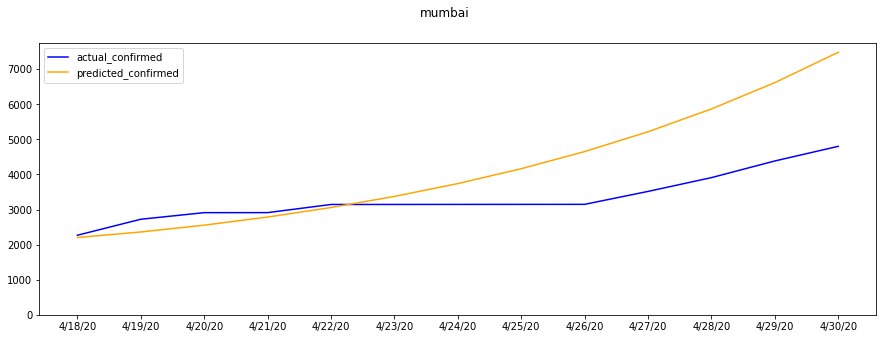

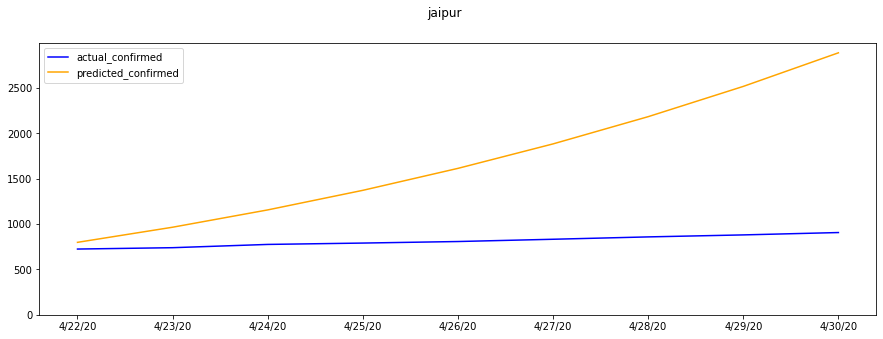

In [10]:
for idx, row in experiments.iterrows():
    region = row['region']
    region_type = row['region_type']
    train1_start_date = row['train1_start_date']
    train1_end_date = row['train1_end_date']
    train2_start_date = row['train2_start_date']
    train2_end_date = row['train2_end_date']
    run_day = row['run_day']
    test_start_date = row['test_start_date']
    test_end_date = row['test_end_date']
    forecast_run_day = row['forecast_run_day']
    forecast_start_date = row['forecast_start_date']
    forecast_end_date = row['forecast_end_date']
    
    params, metrics, model_params = train_eval(region, region_type, 
                                           train1_start_date, train1_end_date, 
                                           train2_start_date, train2_end_date, run_day,
                                           test_start_date, test_end_date,
                                           default_train_config, default_test_config,
                                           max_evals = 10,
                                           mlflow_log = False,
                                           name_prefix = 'mumbai_sample')
    forecast_df = forecast(model_params, forecast_run_day, forecast_start_date, 
                       forecast_end_date, default_forecast_config)
    plot(model_params, forecast_df, forecast_start_date, forecast_end_date)